In [1]:
import sys
import logging
import importlib
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

sys.path.append('../../src/')
import utils  # noqa: E402

In [2]:
data_dir = Path('../../data')

In [14]:
importlib.reload(utils)
from utils import load_all_eliminateds_dict  # noqa: E402
logging.basicConfig(level=logging.DEBUG, stream=sys.stdout)
eliminateds = load_all_eliminateds_dict(data_dir)
logging.basicConfig(level=logging.INFO, stream=sys.stderr)

DEBUG:root:Loading eliminateds from ../../data/statistics/all-flat-none.jsonl
DEBUG:root:Loading eliminateds from ../../data/statistics/all-flat-cn.jsonl
DEBUG:root:Loading eliminateds from ../../data/statistics/all-flat-in.jsonl


In [5]:
importlib.reload(utils)
from utils import load_steps_dict  # noqa: E402
logging.basicConfig(level=logging.DEBUG, stream=sys.stdout)
steps = load_steps_dict(data_dir)
logging.basicConfig(level=logging.INFO, stream=sys.stderr)

DEBUG:root:Loading positive steps from ../../data/step/all-full-thompson-spencer-none.jsonl
DEBUG:root:Loading negative steps from ../../data/step/all-full-thompson-spencer-none.jsonl
DEBUG:root:Loading positive steps from ../../data/step/all-full-thompson-spencer-cn.jsonl
DEBUG:root:Loading negative steps from ../../data/step/all-full-thompson-spencer-cn.jsonl
DEBUG:root:Loading positive steps from ../../data/step/all-full-thompson-spencer-in.jsonl
DEBUG:root:Loading negative steps from ../../data/step/all-full-thompson-spencer-in.jsonl
DEBUG:root:Loading positive steps from ../../data/step/all-full-thompson-lockstep-none.jsonl
DEBUG:root:Loading negative steps from ../../data/step/all-full-thompson-lockstep-none.jsonl
DEBUG:root:Loading positive steps from ../../data/step/all-full-flat-spencer-none.jsonl
DEBUG:root:Loading negative steps from ../../data/step/all-full-flat-spencer-none.jsonl
DEBUG:root:Loading positive steps from ../../data/step/all-full-flat-spencer-cn.jsonl
DEBUG:ro

In [38]:
matching_type = 'full'
scheduler = 'spencer'
memo_scheme = 'in'
input_types = ['positive', 'negative']
xs = np.concatenate([
    steps[matching_type]['thompson'][scheduler][memo_scheme][input_type]
    for input_type in input_types
])
ys = np.concatenate([
    steps[matching_type]['flat'][scheduler][memo_scheme][input_type]
    for input_type in input_types
])
zs = np.concatenate(
    [eliminateds[memo_scheme][input_type] for input_type in input_types])
threshold = 1
# Range excluding outliers
total = xs + ys
quartile_1 = np.quantile(total, 0.25)
quartile_3 = np.quantile(total, 0.75)
iqr = quartile_3 - quartile_1
maximum = np.max(total, where=xs <= quartile_3 + 1.5 * iqr, initial=-np.inf)
minimum = np.min(total, where=xs >= quartile_1 - 1.5 * iqr, initial=np.inf)

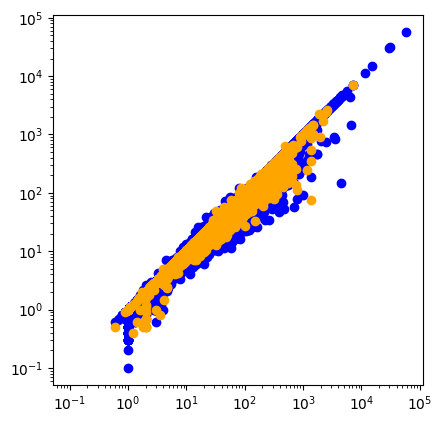

In [39]:
# Scatter plot
logging.basicConfig(level=logging.INFO, stream=sys.stderr, force=True)
plt.scatter(xs[zs < threshold], ys[zs < threshold], c='blue')
plt.scatter(xs[zs >= threshold], ys[zs >= threshold], c='orange')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()

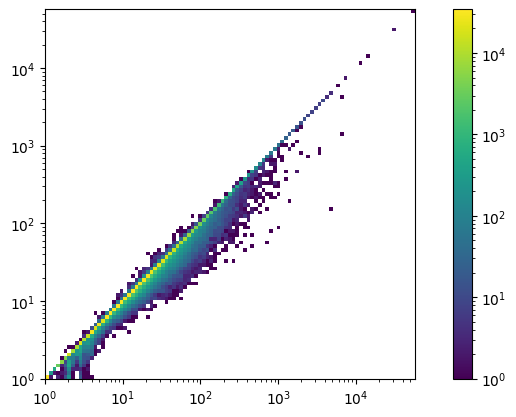

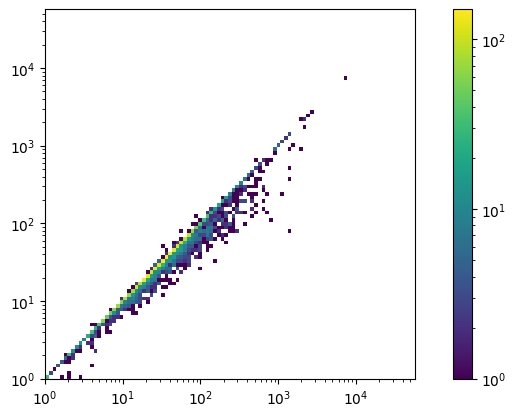

In [40]:
# Histogram 2D
x_space = np.geomspace(1, max(xs), 100)
y_space = np.geomspace(1, max(ys), 100)
h = plt.hist2d(xs[zs < threshold], ys[zs < threshold], bins=(x_space, y_space), norm='log')
plt.colorbar(h[3])
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()

# Histogram 2Dace), norm='log')
h = plt.hist2d(xs[zs >= threshold], ys[zs >= threshold], bins=(x_space, y_space), norm='log')
plt.colorbar(h[3])
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()

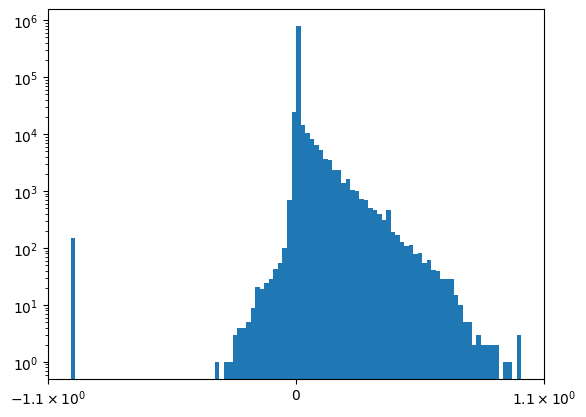

In [41]:
# Atan Histogram
normalized_theta = (np.arctan2(xs, ys) - np.pi/4) / (np.pi/4)
plt.hist(normalized_theta, bins=100, range=[-1, 1])
plt.xscale('symlog')
plt.yscale('log')
plt.show()

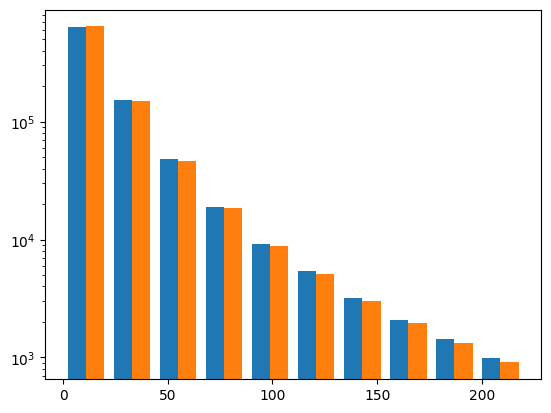

In [42]:
# Histogram (excluding outliers)
plt.hist([xs, ys], range=(minimum, maximum), log=True, bins=10)
plt.show()

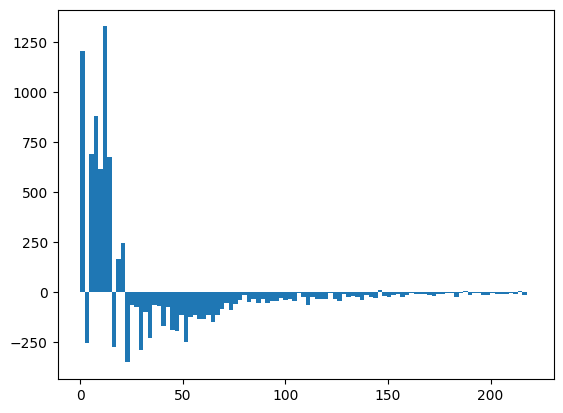

In [43]:
# Difference of histogram (excluding outliers)
plt1, bin1, _ = plt.hist(xs, range=(minimum, maximum), log=True, bins=100)
plt2, bin2, _ = plt.hist(ys, range=(minimum, maximum), log=True, bins=100)
plt.clf()
plt.bar(bin1[:-1], width=np.diff(bin1), height=plt2 - plt1, align='edge')
plt.show()